# 2. Integrate total mass delivered

In this notebook, we will use absorbance to measure the mass *visible* in the image. It should be noted that it is not exactly the total mass delivered as the dye in front and behind the probe is invisible.

We should have run the notebook `1 Preprocessing` first to extract and denoise absorbance data.

First we import Python modules and define some parameters.

In [1]:
# Python imports
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# pixels per cm
pxpcm = 367

# Time step between images (min)
dt = 1.

# Molar extinction coefficient (cm^-1 L/mol)
epsilon = 2900.

# Methylene blue molar mass (g mol^-1)
M = 319.85

## Import fields

In [3]:
A = np.load('absorbance.npy')
mask = np.load('mask.npy')
print(f"Time steps (including time 0): {A.shape[0]}")
print(f"Image dimensions (height, width): {A.shape[1:]}")

Time steps (including time 0): 10
Image dimensions (height, width): (1200, 1920)


## Compute the total mass

The mass is computed by simply summing the absorbance over the entire image. Pixels belonging to the probe shadow are ignored using NaN values of the mask.

In [4]:
select = np.ones_like(mask)
select[np.isnan(mask)] = 0.
mass = 1e3*M/epsilon/pxpcm**2*np.sum(A*select, axis=(1,2))

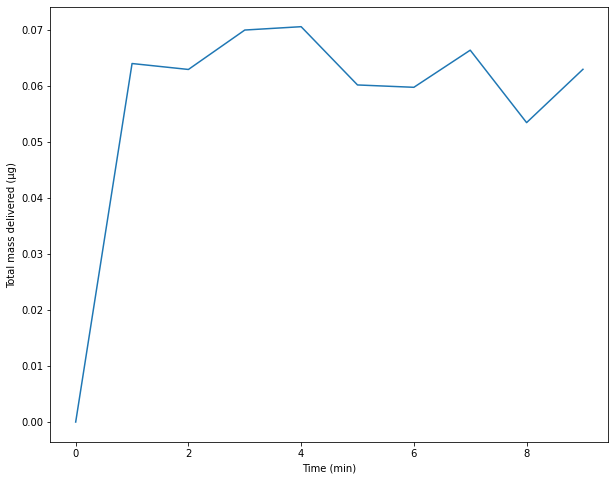

In [5]:
# Plot results

time = np.arange(len(A))*dt

mass[0] = 0
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(time, mass)
plt.ylabel('Total mass delivered (µg)')
plt.xlabel('Time (min)')
plt.show()

## Delivery rate

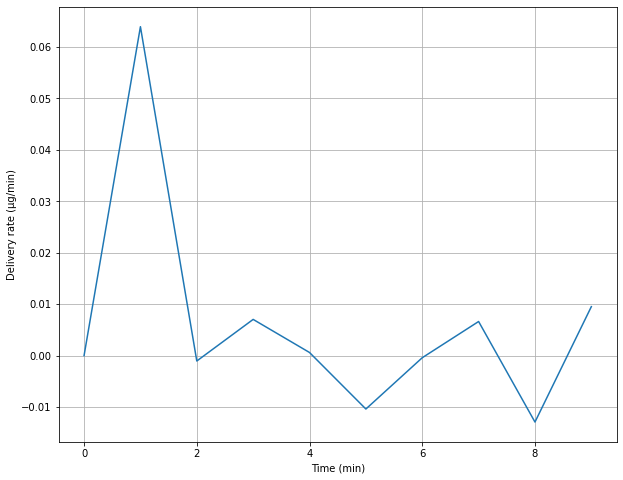

In [6]:
rate = np.empty_like(mass)
rate[0] = 0
rate[1:] = np.diff(mass)/dt

plt.plot(time, rate)
plt.ylabel('Delivery rate (µg/min)')
plt.xlabel('Time (min)')
plt.grid()
plt.show()

## Save the result

In [7]:
np.savetxt('mass.txt', np.hstack((time[:, None], mass[:, None], rate[:, None])), header='# time (min),  mass (ug), rate (ug/min)')

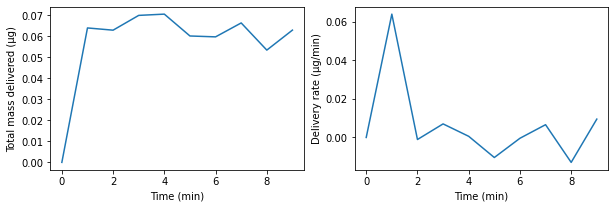

In [8]:
plt.rcParams["figure.figsize"] = (10,3)
figure, ax = plt.subplots(nrows=1, ncols=2)
plt.rcParams['figure.dpi'] = 300

ax[0].plot(time, mass)
ax[0].set_ylabel('Total mass delivered (µg)')
ax[0].set_xlabel('Time (min)')

ax[1].plot(time, rate)
ax[1].set_ylabel('Delivery rate (µg/min)')
ax[1].set_xlabel('Time (min)')
plt.show()